In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm;
from ipywidgets import interact
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as patches

C:\Users\ali_m\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\ali_m\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


#### In bayesian models, chosing hyper parameters and parameters are done with bayesian extemiation the rest is done by ML or DL

## calculation expectation

Let:

   $x$ be a variable
   
   $p(x)$ be the distribution of $x$
   
   $f(x)$ a function from x

then, Expectation of $f(x)$ denoted $E_p[f]$ is defined as:

$ \large E_p[f] =  {\displaystyle \int } f(x)p(x) dx$




## Estimate $\pi$ value, 

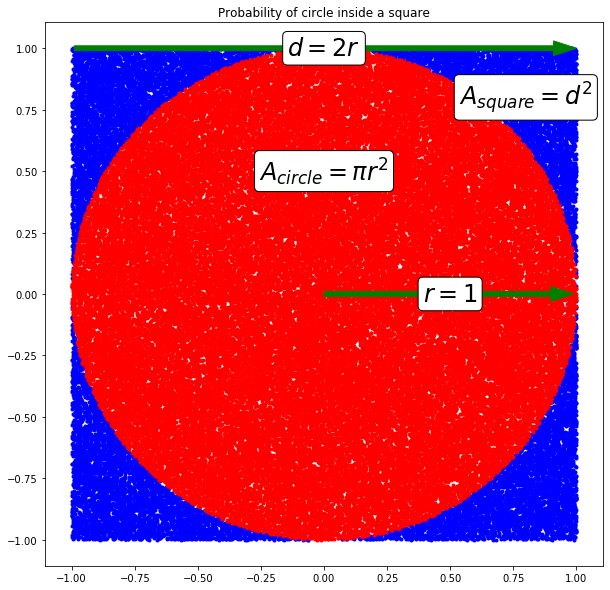

In [33]:
n_sample = 80000
x = np.random.uniform(-1,1,n_sample)
y = np.random.uniform(-1,1,n_sample)
dots = pd.DataFrame()

sq =(x**2 + y**2 ) > 1
cir = (x**2 + y**2 ) <= 1
plt.figure(figsize=(10,10))
plt.scatter(x[sq],y[sq], marker='.', c='b')
plt.scatter(x[cir],y[cir], marker='.', c='r')
plt.arrow(x=0, y=0, dx = 0.9, dy=0, color='g', width=0.02, label='$R$')
plt.arrow(x=-0.99, y=1., dx = 1.9, dy=0, color='g', width=0.02, label='$D$')
plt.text(0.5, 0, r'$r = 1$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
plt.text(0.0, 1., r'$d = 2r$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
plt.text(0.8, 0.8, r'$A_{square} = d^2$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
plt.text(0., 0.5, r'$A_{circle} = \pi r^2$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
plt.title("Probability of circle inside a square")
#plt.legend()
plt.show()


the plot above shows that, in a square of area = 4 where a circle of area= $\pi$ is included in it.

the probability of a point being inside circle is $p$ = $\pi/4$ 

thus $\pi = 4p$

In [34]:
#lets calculate the probability p
labels = cir # if inside circle=1 else 0
p = np.mean(labels) #mean will get the expected value and lable is the f function
p

0.7838

now $\pi$ can be simply calculate as 4p

In [35]:
pi = 4*p
pi

3.1352

## It is a good estimation of $\pi$ with more example it will be closer and it converges when n_samples $\rightarrow \infty$ 